In [ ]:
pip install  qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.9/929.9 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 

In [ ]:
pip install qiskit[machine-learning]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 KB 7.2 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


##FIRST IMPLEMENTATION WITH **Pegasos Quantum Support Vector Classifier**

In [ ]:
##data importation
#pacages importes

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_breast_cancer
# my data keys

cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
#discription of my data
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

(569, 2)
(569, 2)


Text(0.5, 0, 'second principle componenet')

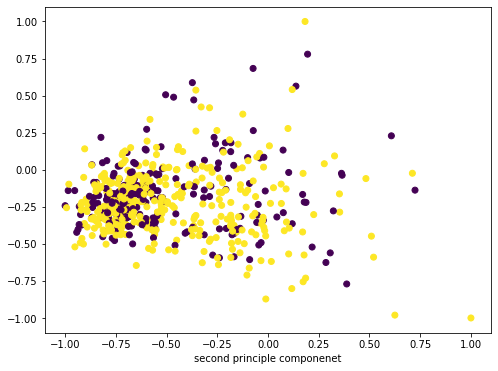

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import scipy
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#features = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(features)


# To find if the classifier is accurate, a common strategy is
# to divide the dataset into a training set and a test set.
# Here the data is divided into 75% training, 25% testing.70 30
train_features, test_features, train_labels, test_labels  = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=109)

#the mutch with this code X_train, X_test, Y_train, Y_test



# Now the dataset's features will be standardized
# to fit a normal distribution.
scaler = StandardScaler().fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)


# To be able to use this data with the given
# number of qubits, the data must be broken down from
# 30 dimensions to `n` dimensions.
# This is done with Principal Component Analysis (PCA),
# which finds patterns while keeping variation.



n =2   #8 #6 #4 # 2 #test for 4 #30 8 H # number of principal components kept #the futur application we wanna aplay for more qubites and trazin the algorithem to get more performance

pca = PCA(n_components = n).fit(train_features)
#PCA FOR THE TRAIN AND TEST LABESL

train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

#print(train_features.shape)
#print(train_features)



# The last step in the data processing is
# to scale the data to be between -1 and 1

pii= np.pi
samples = np.append(train_features, test_features, axis=0)
print(samples.shape)


minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
#minmax_scale = MinMaxScaler(-1, 1).fit(samples)
# will be changed to 0, np.pi   ((((-1, 1    #change for 2 (delite )  #(0, 2*np.pi)
train_features = minmax_scale.transform(train_features)
test_features = minmax_scale.transform(test_features)



# Now some sample should be picked to train the model from
#training_input = {key: (X_train[Y_train == k, :])[:training_size] for k, key in enumerate(class_labels)}
#test_input = {key: (X_train[Y_train == k, :])[training_size:(training_size+test_size)] for k, key in enumerate(class_labels)}

#ty_label = train_features
#print(ty_label.shape)
#ty_label.extend(test_features)

#ploting my figures to see


ty_label = np.concatenate((train_features, test_features))
print(ty_label.shape)

plt.figure(figsize=(8,6))
plt.scatter(ty_label[:,0],ty_label[:,1],c=cancer['target'])
plt.xlabel('first principle componenet ')
plt.xlabel('second principle componenet')



#train_features, test_features, train_labels, test_labels = train_test_split(
 #   features, labels, train_size=15, shuffle=False)

In [ ]:
# number of qubits is equal to the number of features
num_qubits = 2  #8 #6 #2 #30 is was hard for my classical computer simulate 30 qubit
#after yring with number of qubits the best number was 2

# number of steps performed during the training procedure
tau = 120 #80 #60  #100

# regularization parameter
C = 1100  #1400 #1000

In [ ]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals

from qiskit_machine_learning.kernels import QuantumKernel

algorithm_globals.random_seed = 12345

pegasos_backend = QuantumInstance(
    BasicAer.get_backend("statevector_simulator"),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = QuantumKernel(feature_map=feature_map, quantum_instance=pegasos_backend)

In [ ]:
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(train_features, train_labels)

# testing
pegasos_score = pegasos_qsvc.score(test_features, test_labels)
print(f"PegasosQSVC classification test score: {pegasos_score}")

PegasosQSVC classification test score: 0.9300699300699301


In [ ]:
grid_step = 0.2

margin = 0.2
grid_x, grid_y = np.meshgrid( np.arange(-margin, np.pi + margin, grid_step), np.arange(-margin, np.pi + margin, grid_step) )

In [ ]:
meshgrid_features = np.column_stack((grid_x.ravel(), grid_y.ravel()))
meshgrid_colors = pegasos_qsvc.predict(meshgrid_features)

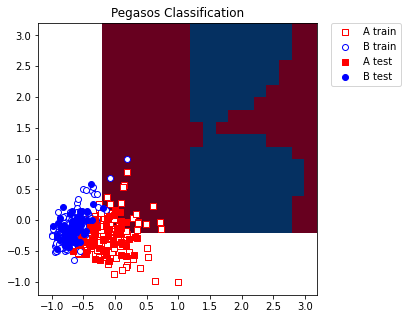

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
meshgrid_colors = meshgrid_colors.reshape(grid_y.shape)
plt.pcolormesh(grid_x, grid_y, meshgrid_colors, cmap="RdBu", shading="bilinear")

plt.scatter(
    train_features[:, 0][train_labels == 0],
    train_features[:, 1][train_labels == 0],
    marker="s",
    facecolors="w",
    edgecolors="r",
    label="A train",
)
plt.scatter(
    train_features[:, 0][train_labels == 1],
    train_features[:, 1][train_labels == 1],
    marker="o",
    facecolors="w",
    edgecolors="b",
    label="B train",
)

plt.scatter(
    test_features[:, 0][test_labels == 0],
    test_features[:, 1][test_labels == 0],
    marker="s",
    facecolors="r",
    edgecolors="r",
    label="A test",
)
plt.scatter(
    test_features[:, 0][test_labels == 1],
    test_features[:, 1][test_labels == 1],
    marker="o",
    facecolors="b",
    edgecolors="b",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Pegasos Classification")
plt.show()

In [ ]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright

#SECOND IMPLEMENTATION WITH SAME DATASETS USING **QuantumKernelTrainer**

In [ ]:
# External imports
from pylab import cm
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import circuit_drawer
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data


class QKTCallback:
    """Callback wrapper class."""

    def __init__(self) -> None:
        self._data = [[] for i in range(5)]

    def callback(self, x0, x1=None, x2=None, x3=None, x4=None):
        """
        Args:
            x0: number of function evaluations
            x1: the parameters
            x2: the function value
            x3: the stepsize
            x4: whether the step was accepted
        """
        self._data[0].append(x0)
        self._data[1].append(x1)
        self._data[2].append(x2)
        self._data[3].append(x3)
        self._data[4].append(x4)

    def get_callback_data(self):
        return self._data

    def clear_callback_data(self):
        self._data = [[] for i in range(5)]

[]
[]


IndexError: ignored

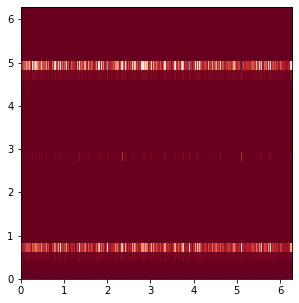

In [ ]:
adhoc_dimension = 2


X_train, y_train, X_test, y_test, adhoc_total = train_features, test_features, train_labels, test_labels , cancer['data']

print(X_train[np.where(y_train[:] == 0), 0])
print(X_train[np.where(y_train[:] == 0), 1])


plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

plt.scatter(
    X_train[np.where(y_train[:] == 0), 0],
    X_train[np.where(y_train[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    X_train[np.where(y_train[:] == 1), 0],
    X_train[np.where(y_train[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    X_test[np.where(y_test[:] == 0), 0],
    X_test[np.where(y_test[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    X_test[np.where(y_test[:] == 1), 0],
    X_test[np.where(y_test[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")

plt.show()

In [ ]:
# Create a rotational layer to train. We will rotate each qubit the same amount.
training_params = ParameterVector("θ", 1)
fm0 = QuantumCircuit(2)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)

# Use ZZFeatureMap to represent input data
fm1 = ZZFeatureMap(2)

# Create the feature map, composed of our two circuits
fm = fm0.compose(fm1)

print(circuit_drawer(fm))
print(f"Trainable parameters: {training_params}")# Create a rotational layer to train. We will rotate each qubit the same amount.
training_params = ParameterVector("θ", 1)
fm0 = QuantumCircuit(2)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)

# Use ZZFeatureMap to represent input data
fm1 = ZZFeatureMap(2)

# Create the feature map, composed of our two circuits
fm = fm0.compose(fm1)

print(circuit_drawer(fm))
print(f"Trainable parameters: {training_params}")

In [ ]:
# Instantiate quantum kernel
quant_kernel = TrainableFidelityQuantumKernel(feature_map=fm, training_parameters=training_params)

# Set up the optimizer
cb_qkt = QKTCallback()
spsa_opt = SPSA(maxiter=10, callback=cb_qkt.callback, learning_rate=0.05, perturbation=0.05)

# Instantiate a quantum kernel trainer.
qkt = QuantumKernelTrainer(
    quantum_kernel=quant_kernel, loss="svc_loss", optimizer=spsa_opt, initial_point=[np.pi / 2]
)

In [ ]:
# Train the kernel using QKT directly
qka_results = qkt.fit(X_train, y_train)
optimized_kernel = qka_results.quantum_kernel
print(qka_results)

In [ ]:
# Use QSVC for classification
qsvc = QSVC(quantum_kernel=optimized_kernel)

# Fit the QSVC
qsvc.fit(X_train, y_train)

# Predict the labels
labels_test = qsvc.predict(X_test)

# Evalaute the test accuracy
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test, y_pred=labels_test)
print(f"accuracy test: {accuracy_test}")

#RUNNING IN REAL QUANTUM COMPUTER

In [ ]:
from qiskit import IBMQ

IBMQ.save_account("7f7810855b472240e1e33d3caab8a942c7c5d868f4a15e1330a69e3447ff60b1e17207ef3ba66f4f6a6cd10a302f12c411951b0773ced76f951cd21049b653ce")

In [ ]:
IBMQ.load_account()

In [ ]:
##get the back end
for backend in provider.backends():
  try:
    qubit_count = len(backend.properties().qubits)
  except:
    qubit_count = "Simulated"
  print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits ")


In [ ]:
provider = IBMQ.get_provider('ibm-q')